In [1]:
# train_new.csv 제작 셀 class를 3개로 나눔

import pandas as pd
import os

train_df = pd.read_csv('../input/data/train/train.csv')
train_dir = '../input/data/train/images'
out_path = 'train_new.csv'

df = pd.DataFrame(None, columns = ['path', 'mask', 'sex', 'age'])

def age_group(x):
    if x < 30:
        return 0
    elif x < 60:
        return 1
    else:
        return 2

for index, line in enumerate(train_df.iloc):
    for file in list(os.listdir(os.path.join(train_dir, line['path']))):
        if file[0] == '.':
            continue
        
        data = {'path':os.path.join(train_dir, line['path'], file)}
        if file.split('.')[0] == 'normal': data['mask'] = 2
        elif file.split('.')[0] == 'incorrect_mask': data['mask'] = 1
        else: data['mask'] = 0
        
        data['sex'] = 0 if line['gender'] == 'male' else 1
        
        if line['age'] < 30: data['age'] = 0
        elif line['age'] < 60: data['age'] = 1
        else: data['age'] = 2
        df = df.append(data, ignore_index=True)

df.to_csv(out_path)

In [2]:
import pandas as pd

df = pd.read_csv('../input/data/train/train_new.csv')
print(df['mask'].value_counts())
print(df['sex'].value_counts())
print(df['age'].value_counts())

2    13500
1     2700
0     2700
Name: mask, dtype: int64
1    11606
0     7294
Name: sex, dtype: int64
0    8967
1    8589
2    1344
Name: age, dtype: int64


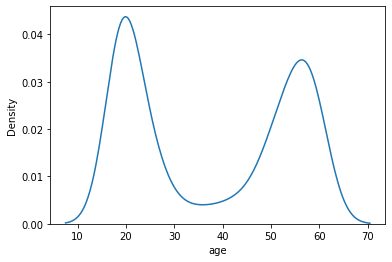

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../input/data/train/train.csv')
sns.kdeplot(df['age'])
plt.show()

In [1]:
# train_new2.csv 제작: class를 18개로 나눔
import pandas as pd
import os
from pathlib import Path
pd.set_option('display.max_colwidth', 100)

df = pd.DataFrame(None, columns = ['path', 'label'])

train_df = pd.read_csv('../input/data/train/train.csv')
train_dir = '../input/data/train/images'
out_path = '../input/data/train/train_new2.csv'

for index, line in enumerate(train_df.iloc):
    for file in list(os.listdir(os.path.join(train_dir, line['path']))):
        if file[0] == '.':
            continue
        if file.split('.')[0] == 'normal':
            mask = 2
        elif file.split('.')[0] == 'incorrect_mask':
            mask = 1
        else:
            mask = 0
        gender = 0 if line['gender'] == 'male' else 1
        data = {
            'path': os.path.join(train_dir, line['path'], file),
            'label': 0
        }
        df = df.append(data, ignore_index=True)

df.to_csv(out_path)

In [1]:
# info_new.csv 제작: ImageID를 path로 수정
import pandas as pd
import os

df = pd.DataFrame(None, columns = ['path', 'label'])

train_df = pd.read_csv('../input/data/eval/info.csv')
train_dir = '../input/data/eval/images'
out_path = '../input/data/eval/info_new.csv'

for line in train_df.iloc:
    data = {
        'path': os.path.join(train_dir, line['ImageID']),
        'label': 0
    }
    df = df.append(data, ignore_index=True)

df.to_csv(out_path)

In [3]:
# train_new4.csv 제작 셀 (최초 한번만 실행) class를 3개로 나눔 + 사람 id 정보

import pandas as pd
import os

train_df = pd.read_csv('../input/data/train/train.csv')
train_dir = '../input/data/train/images'
out_path = '../input/data/train/train_new4.csv'

df = pd.DataFrame(None, columns = ['path', 'mask', 'sex', 'age', 'id'])

def age_group(x):
    if x < 30:
        return 0
    elif x < 60:
        return 1
    else:
        return 2

for index, line in enumerate(train_df.iloc):
    for file in list(os.listdir(os.path.join(train_dir, line['path']))):
        if file[0] == '.':
            continue
        
        data = {'path':os.path.join(train_dir, line['path'], file)}
        if file.split('.')[0] == 'normal': data['mask'] = 2
        elif file.split('.')[0] == 'incorrect_mask': data['mask'] = 1
        else: data['mask'] = 0
        
        data['sex'] = 0 if line['gender'] == 'male' else 1
        
        if line['age'] < 30: data['age'] = 0
        elif line['age'] < 60: data['age'] = 1
        else: data['age'] = 2

        data['id'] = line['id']
        
        df = df.append(data, ignore_index=True)

df.to_csv(out_path, index = False)

In [9]:
from sklearn.model_selection import train_test_split
import pandas as pd

target = 'age'
id = pd.read_csv('../input/data/train/train.csv')
train_id, valid_id = train_test_split(id['id'], test_size=0.2, random_state=11)
df = pd.read_csv('../input/data/train/train_new4.csv')
df[df['id'].isin(train_id)]

,Unnamed: 0,path,mask,sex,age,id
0,0,../input/data/train/images/000001_female_Asian_45/incorrect_mask.jpg,1,1,1,000001
1,1,../input/data/train/images/000001_female_Asian_45/mask5.jpg,2,1,1,000001
2,2,../input/data/train/images/000001_female_Asian_45/mask4.jpg,2,1,1,000001
3,3,../input/data/train/images/000001_female_Asian_45/mask2.jpg,2,1,1,000001
4,4,../input/data/train/images/000001_female_Asian_45/mask3.jpg,2,1,1,000001
...,...,...,...,...,...,...
18895,18895,../input/data/train/images/006959_male_Asian_19/mask4.jpg,2,0,0,006959
18896,18896,../input/data/train/images/006959_male_Asian_19/mask2.jpg,2,0,0,006959
18897,18897,../input/data/train/images/006959_male_Asian_19/mask3.jpg,2,0,0,006959
18898,18898,../input/data/train/images/006959_male_Asian_19/normal.jpg,0,0,0,006959
